**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [2]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
#import pylab as pl
import matplotlib.pyplot as plt
import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

#%pylab inline
%matplotlib inline

In [3]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,'line with slope1, intercept0, and errorbars')

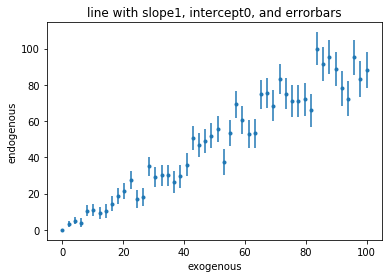

In [4]:
x = np.linspace(0, 100, 50)
y = line(1, x, 0, errors)
#plt.plot(x, y)
plt.errorbar(x, y, yerr=errors(x), fmt='.')
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('line with slope{}, intercept{}, and errorbars'.format(1, 0))

**Figure 1**: the above line show the line represented as y=x, with uncertainties as errobars. It aligns with the defined function: with increased x, the error is increased, and y has positive correlation with x (defined slope is 1). 

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [5]:
#printy, x as a dataframe:
data = np.array([x, y])
data = pd.DataFrame({'x': data[0], 'y': data[1]})
data.head()
#print(y, x)

,x,y
0,0.000000,0.000000
1,2.040816,3.274630
2,4.081633,5.177852
3,6.122449,3.993959
4,8.163265,10.694362


In [6]:
x = sm.add_constant(data.x)
x.head()

,const,x
0,1.0,0.000000
1,1.0,2.040816
2,1.0,4.081633
3,1.0,6.122449
4,1.0,8.163265


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
mod = sm.OLS(data.y, sm.add_constant(data.x)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     647.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.61e-29
Time:                        21:50:40   Log-Likelihood:                -172.78
No. Observations:                  50   AIC:                             349.6
Df Residuals:                      48   BIC:                             353.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5584      2.180      0.256      0.799      -3.825       4.942
x              0.9560      0.038     25.448      0.000       0.880       1.032
==============================================================================
Omnibus:                        0.272   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.183
Skew:                           0.141   Prob(JB):                        0.913
Kurtosis:                       2.906   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Figure 2**: the OLS regression results of y and x with added constant.The model has good R-squared and the coefficient for independent variables (x2) are statistic significant (p-value is 0). However, the intercept(constant) is not statistic significant. 

# 4. plot the data (as points) and both statsmodels fits

Text(0.5,1,'Scatterplot with fitted line of data')

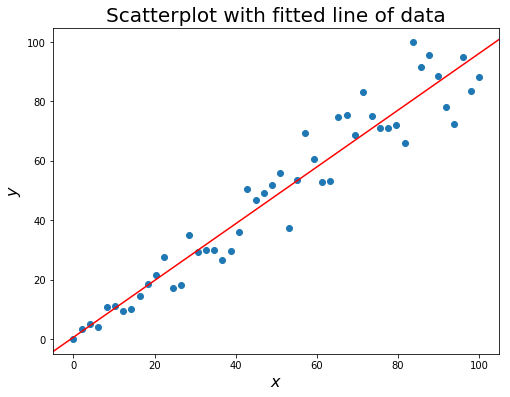

In [8]:
figure, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data.x, data.y)
mod = sm.OLS(data.y, sm.add_constant(data.x)).fit()
abline_plot(model_results=mod, ax=ax, color='red')

plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'Scatterplot with fitted line of data', fontsize = 20)

**Figure 3**: the scatter plot of data point with fitthed line by statsmodels. It aligns with the defined function: with increased x, the error is increased, and y has positive correlation with x (defined slope is 1). While the added constant seems has no influence to the fitted line.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,1,'line with slope1, intercept0, and errorbars')

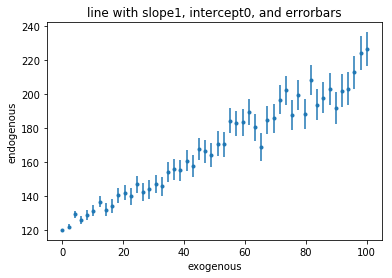

In [30]:
x2 = np.linspace(0, 100, 50)
y2 = line(1, x2, 120, errors)
#plt.plot(x, y)
#plt.ylim(0, 300)
plt.errorbar(x2, y2, yerr=errors(x2), fmt='.')
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('line with slope{}, intercept{}, and errorbars'.format(1, 0))

Figure 4: the above line show the line represented as y=x+120, with uncertainties as errobars. It aligns with the defined function: with increased x, the error is increased, and y has positive correlation with x (defined slope is 1). While the intercept is start from 120 now.

# 6. repeat step 3

In [10]:
data2 = np.array([x2, y2])
data2 = pd.DataFrame({'x2': data2[0], 'y2': data2[1]})
data2.head()

,x2,y2
0,0.000000,120.000000
1,2.040816,125.179461
2,4.081633,125.047679
3,6.122449,124.826480
4,8.163265,124.088252


In [11]:
mod = sm.OLS(data2.y2, sm.add_constant(data2.x2)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1006.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           7.40e-34
Time:                        21:50:44   Log-Likelihood:                -165.50
No. Observations:                  50   AIC:                             335.0
Df Residuals:                      48   BIC:                             338.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.7273      1.884     63.005      0.000     114.938     122.516
x2             1.0301      0.032     31.719      0.000       0.965       1.095
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   2.528
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.511
Skew:                           0.247   Prob(JB):                        0.774
Kurtosis:                       3.030   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Figure 5:** the OLS regression results of y2 and x2 with added constant. The model has good R-squared and the coefficient for both intercept(constant) and independent variables (x2) are statistic significant (p-value is 0).

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [37]:
error = 1.0/np.sqrt(data2.y2)
weights = error.replace(np.inf, np.mean(np.sqrt(data2.y2)))

Text(0,0.5,'y2')

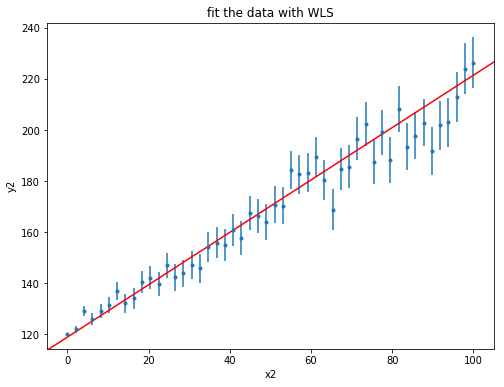

In [42]:
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(x2, y2, yerr=errors(x2), fmt='.')
mod_wls = smf.wls(formula='y2 ~ x2', data = data2, weights=abs(weights)).fit()
abline_plot(model_results=mod_wls, ax=ax, color='red')
ax.set_title('fit the data with WLS')
ax.set_xlabel('x2')
ax.set_ylabel('y2')

Figure 5: fit the data with WLS weighted least square, observations with large uncertainties will consider less inportant

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

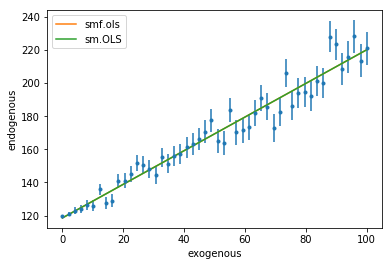

In [42]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
mod_smf = smf.ols('y2 ~ x2 + const', data={'x2':x2, 'y2':y2, 'const':np.ones(len(x2))}).fit()
mod = sm.OLS(y2, sm.add_constant(x2)).fit()
plt.errorbar(x2, y2, yerr=errors(x2), fmt='.')
plt.plot(x2, mod_smf.fittedvalues, '-', label="smf.ols")
plt.plot(x2, mod.fittedvalues, '-', label="sm.OLS")
plt.xlabel("exogenous")
plt.ylabel("endogenous")
plt.legend();

**Figure 6**: Use both smf and sm method to fit the line. It shows that the two lines is duplicated, therefore these two methods are same. 